In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# Read in the file
data = pd.read_csv("Fish.csv")

In [91]:
# Take a look at the counts of different species
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


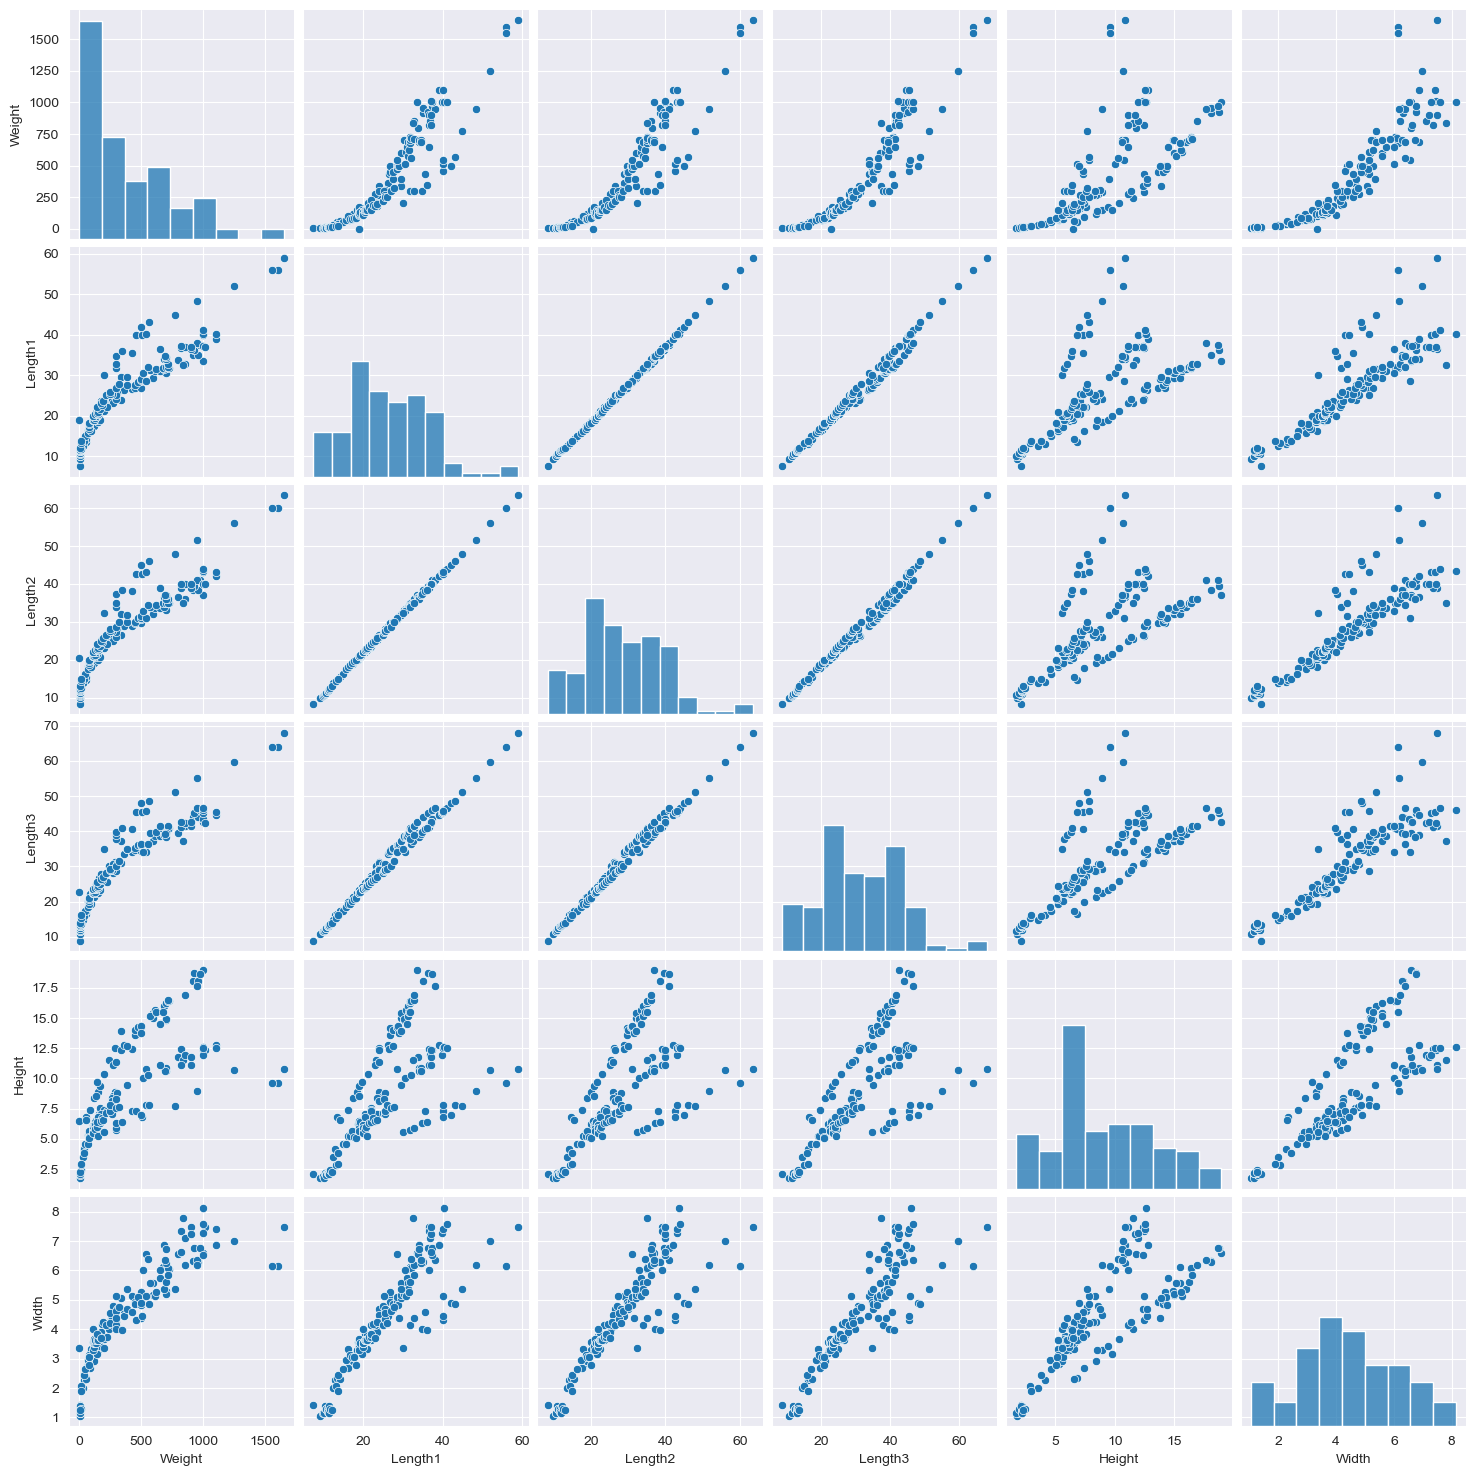

In [92]:
# Observe the correlation using seaborn pairplot
fig = sns.pairplot(data)
fig.savefig("./pair_plot.png", dpi = 1000)

In [93]:
# We will make use of the species for regression
# by one-hot encoding.
# Bream: 001, Roach: 010, Whitefish: 011, Parkki: 100, Perch: 101, Pike: 110, Smelt: 111
types = {
    "Bream": 0b001,
    "Roach": 0b010,
    "Whitefish": 0b011,
    "Parkki": 0b100,
    "Perch": 0b101,
    "Pike": 0b110,
    "Smelt": 0b111,
}

def get_type(name):
    return types.get(name, "Invalid Season")

s_type = []

for index, row in data.iterrows():
    species = row['Species']
    s_type.append(get_type(species))

data['SpeciesCode'] = s_type

data

,Species,Weight,Length1,Length2,Length3,Height,Width,SpeciesCode
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,7
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,7
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,7
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,7


In [94]:
# Read in the random train/test split we did for you.
import pickle as pkl
with open('experiments.pkl', 'rb') as f:
    indices = pkl.load(f)
# train/test split with first 80% indices as training sample

In [95]:
# use the rest of the features to predict the Weight of the fish
data['Index'] = indices
data = data.sort_values("Index", ascending=True)
train_count = round(data.shape[0] * 0.8)
test_count = data.shape[0] - train_count
train_set = data.head(train_count)
test_set = data.tail(test_count)
train_set

,Species,Weight,Length1,Length2,Length3,Height,Width,SpeciesCode,Index
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943,2,0
26,Bream,720.0,32.0,35.0,40.6,16.3618,6.0900,1,1
39,Roach,120.0,18.6,20.0,22.2,6.2160,3.5742,2,2
139,Pike,770.0,44.8,48.0,51.2,7.6800,5.3760,6,3
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440,6,4
...,...,...,...,...,...,...,...,...,...
25,Bream,725.0,31.8,35.0,40.9,16.3600,6.0532,1,122
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1,123
122,Perch,820.0,37.1,40.0,42.5,11.1350,6.6300,5,124
56,Whitefish,270.0,24.1,26.5,29.3,8.1454,4.2485,3,125


In [96]:
# standardize the data using the training set
# no sklearn method allowed here

import copy

train_mean = []
train_std = []
col_names = ["Length1", "Length2", "Length3", "Height", "Width", "SpeciesCode"]

def get_mean_and_std(col):
    mean = col.mean(axis=0)
    std = col.std(axis=0)
    return mean, std

def standardize_col(col, mean, std):
    standardized_col = []
    for cell in col:
        standardized_col.append((cell - mean) / std)
    return standardized_col


def standardize_sets(trains, tests):
    for col_name in col_names:
        mean, std = get_mean_and_std(trains[col_name])
        trains[col_name] = standardize_col(trains[col_name], mean, std)
        tests[col_name] = standardize_col(tests[col_name], mean, std)


standardized_train_set = copy.deepcopy(train_set)
standardized_test_set = copy.deepcopy(test_set)
standardize_sets(train_set, standardized_test_set)

print(standardized_train_set)
print(train_set)

       Species  Weight  Length1  Length2  Length3   Height   Width  \
42       Roach   120.0     19.4     21.0     23.7   6.1146  3.2943   
26       Bream   720.0     32.0     35.0     40.6  16.3618  6.0900   
39       Roach   120.0     18.6     20.0     22.2   6.2160  3.5742   
139       Pike   770.0     44.8     48.0     51.2   7.6800  5.3760   
143       Pike  1550.0     56.0     60.0     64.0   9.6000  6.1440   
..         ...     ...      ...      ...      ...      ...     ...   
25       Bream   725.0     31.8     35.0     40.9  16.3600  6.0532   
3        Bream   363.0     26.3     29.0     33.5  12.7300  4.4555   
122      Perch   820.0     37.1     40.0     42.5  11.1350  6.6300   
56   Whitefish   270.0     24.1     26.5     29.3   8.1454  4.2485   
45       Roach   160.0     20.5     22.5     25.3   7.0334  3.8203   

     SpeciesCode  Index  
42             2      0  
26             1      1  
39             2      2  
139            6      3  
143            6      4  
.. 

C:\Users\BowenDeng\AppData\Local\Temp\ipykernel_1604\2655953033.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trains[col_name] = standardize_col(trains[col_name], mean, std)


In [123]:
# use the linear_regression model to solve this problem
# from linear_regression import LinearReg
class LinearReg(object):
    def __init__(self, indim=1, outdim=1):
        # initialize the parameters first.
        self.W = np.zeros(shape=(indim+1, outdim))

    def fit(self, X, T):
        # implement the .fit() using the simple least-square closed-form solution:
        X = np.hstack([X, np.ones(shape=[X.shape[0], 1])])
        self.W = np.linalg.inv(X.T@X) @ X.T @ T
        return self.W
        # HINT:
        #   extend the input features before fitting to it.
        #   compute the weight matrix of shape [indim+1, outdim]

    def predict(self, X):
        # implement the .predict() using the parameters learned by .fit()
        X = np.hstack([X, np.ones(shape=[X.shape[0], 1])])
        return X @ self.W

# create the model
model = LinearReg()
model2 = LinearReg()
# fit the model
std_param = standardized_train_set.iloc[:, 2:8]
std_target = standardized_train_set.iloc[:, 1:2]

nor_param = train_set.iloc[:, 2:8]
nor_target = train_set.iloc[:, 1:2]

W = model.fit(std_param, std_target)

W2 = model2.fit(nor_param, nor_target)

def get_mse_loss(w, x, t):
    predict_val = []
    t_val = np.array(t.values.tolist())
    w_val = np.array(w.values.tolist())

    for index, row in x.iterrows():
        row_val = []
        for col_name in col_names:
            row_val.append(row[col_name])
        row_val.append(1)
        row_val = np.array(row_val)
        predict_val.append(row_val @ w_val)
    predict_val = np.array(predict_val)
    loss = 0
    for j in range(predict_val.shape[0]):
        loss += pow(t_val[j] - predict_val[j], 2)
    return loss / predict_val.shape[0]


# compute the loss on the training set
# get_mse_loss(W, std_param, std_target)
print("loss for standardized test set is: ")
print(get_mse_loss(W, std_param, std_target))
# compute the loss on the test set
print("loss for test without standardized set is: ")
print(get_mse_loss(W2, nor_param, nor_target))
# report the losses

loss for standardized test set is: 
[13289.01910973]
loss for test without standardized set is: 
[13289.01910973]


In [124]:
# Bonus: Further Analysis
# Can you further analyze the result yielded and make improvement?

ValueError: shapes (32, 10) and (7, 1) not aligned